# Informe de Competencia Kaggle -  Intorducción al Machine Learning 2023-11

- Paul Guzman
- Diego Fernando Gómez
- Juan Felipe Manjarrés
- Santiago Calderón

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set_style()

# Exploracion de datos

Los datos se cargaron del set entregado en la competencia de Kaggle.

In [60]:
train_dir = "data/Train.xlsx"

data = pd.read_excel(train_dir)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,240000,2,2,2,37,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
1,240000,2,3,1,43,0,0,0,0,0,...,65130,66494,67441,2300,2400,2329,2411,2050,2000,0
2,40000,2,1,2,24,0,0,0,0,0,...,37263,35224,34111,5000,8017,7000,4000,5000,5000,1
3,360000,1,1,2,29,-2,-2,-2,-2,-2,...,3466,1630,2931,2358,3788,3483,1638,2946,16950,0
4,130000,1,1,2,27,0,0,0,0,0,...,35194,35951,36703,1867,1872,1256,1500,1500,1500,0


In [61]:
data.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [62]:
data = data.rename(columns={"default.payment.next.month":"default", "PAY_0":"PAY_1"})

In [63]:
gr = data.groupby("default")[["LIMIT_BAL"]].count()
gr["pct"] = gr["LIMIT_BAL"]/gr["LIMIT_BAL"].sum()
gr

,LIMIT_BAL,pct
default,,
0,18690,0.778782
1,5309,0.221218


Las clases no estan sgnificativamente desbalanceadas, aunque se ve que existe un porcentaje menor de respuestas positivas que negativas. 

In [64]:
XTrain, XTest, yTrain, yTest = train_test_split(data.drop(columns="default"), data["default"], test_size=0.2, random_state=7)

In [65]:
data_train = pd.concat([XTrain,yTrain],axis=1)
gr = data_train.groupby("default")[["LIMIT_BAL"]].count()
gr["pct"] = gr["LIMIT_BAL"]/gr["LIMIT_BAL"].sum()
gr

,LIMIT_BAL,pct
default,,
0,14978,0.780145
1,4221,0.219855


In [66]:
var_categ = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

var_cont = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

data_train[var_cont].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,19199.000000,19199.000000,19199.000000,19199.000000,1.919900e+04,19199.000000,19199.000000,19199.000000,19199.000000,1.919900e+04,19199.000000,19199.000000,19199.000000,19199.000000
mean,167264.424189,35.484348,51039.577322,49032.712329,4.697210e+04,43227.804521,40361.107141,39000.315173,5620.931299,5.956795e+03,5219.914110,4914.133184,4849.605917,5114.730923
std,129732.975552,9.197402,73530.921163,71027.002951,6.982228e+04,64343.973659,60694.859580,59465.813171,16639.820942,2.413026e+04,17755.914586,16280.270269,15692.645031,17024.830375
min,10000.000000,21.000000,-154973.000000,-69777.000000,-6.150600e+04,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3516.000000,2910.000000,2.642000e+03,2311.500000,1721.500000,1239.500000,1000.000000,8.270000e+02,390.000000,300.000000,240.500000,148.000000
50%,140000.000000,34.000000,22291.000000,21127.000000,2.005700e+04,19048.000000,18135.000000,17124.000000,2102.000000,2.011000e+03,1781.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.500000,66972.500000,64244.000000,6.034900e+04,54446.500000,50481.000000,49563.000000,5000.000000,5.000000e+03,4497.500000,4007.000000,4030.000000,4000.000000
max,800000.000000,79.000000,746814.000000,743970.000000,1.664089e+06,706864.000000,823540.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,443001.000000


#### Graficas descriptivas

#### Variables discretas
Graficas correspondientes a las variables discretas del analisis

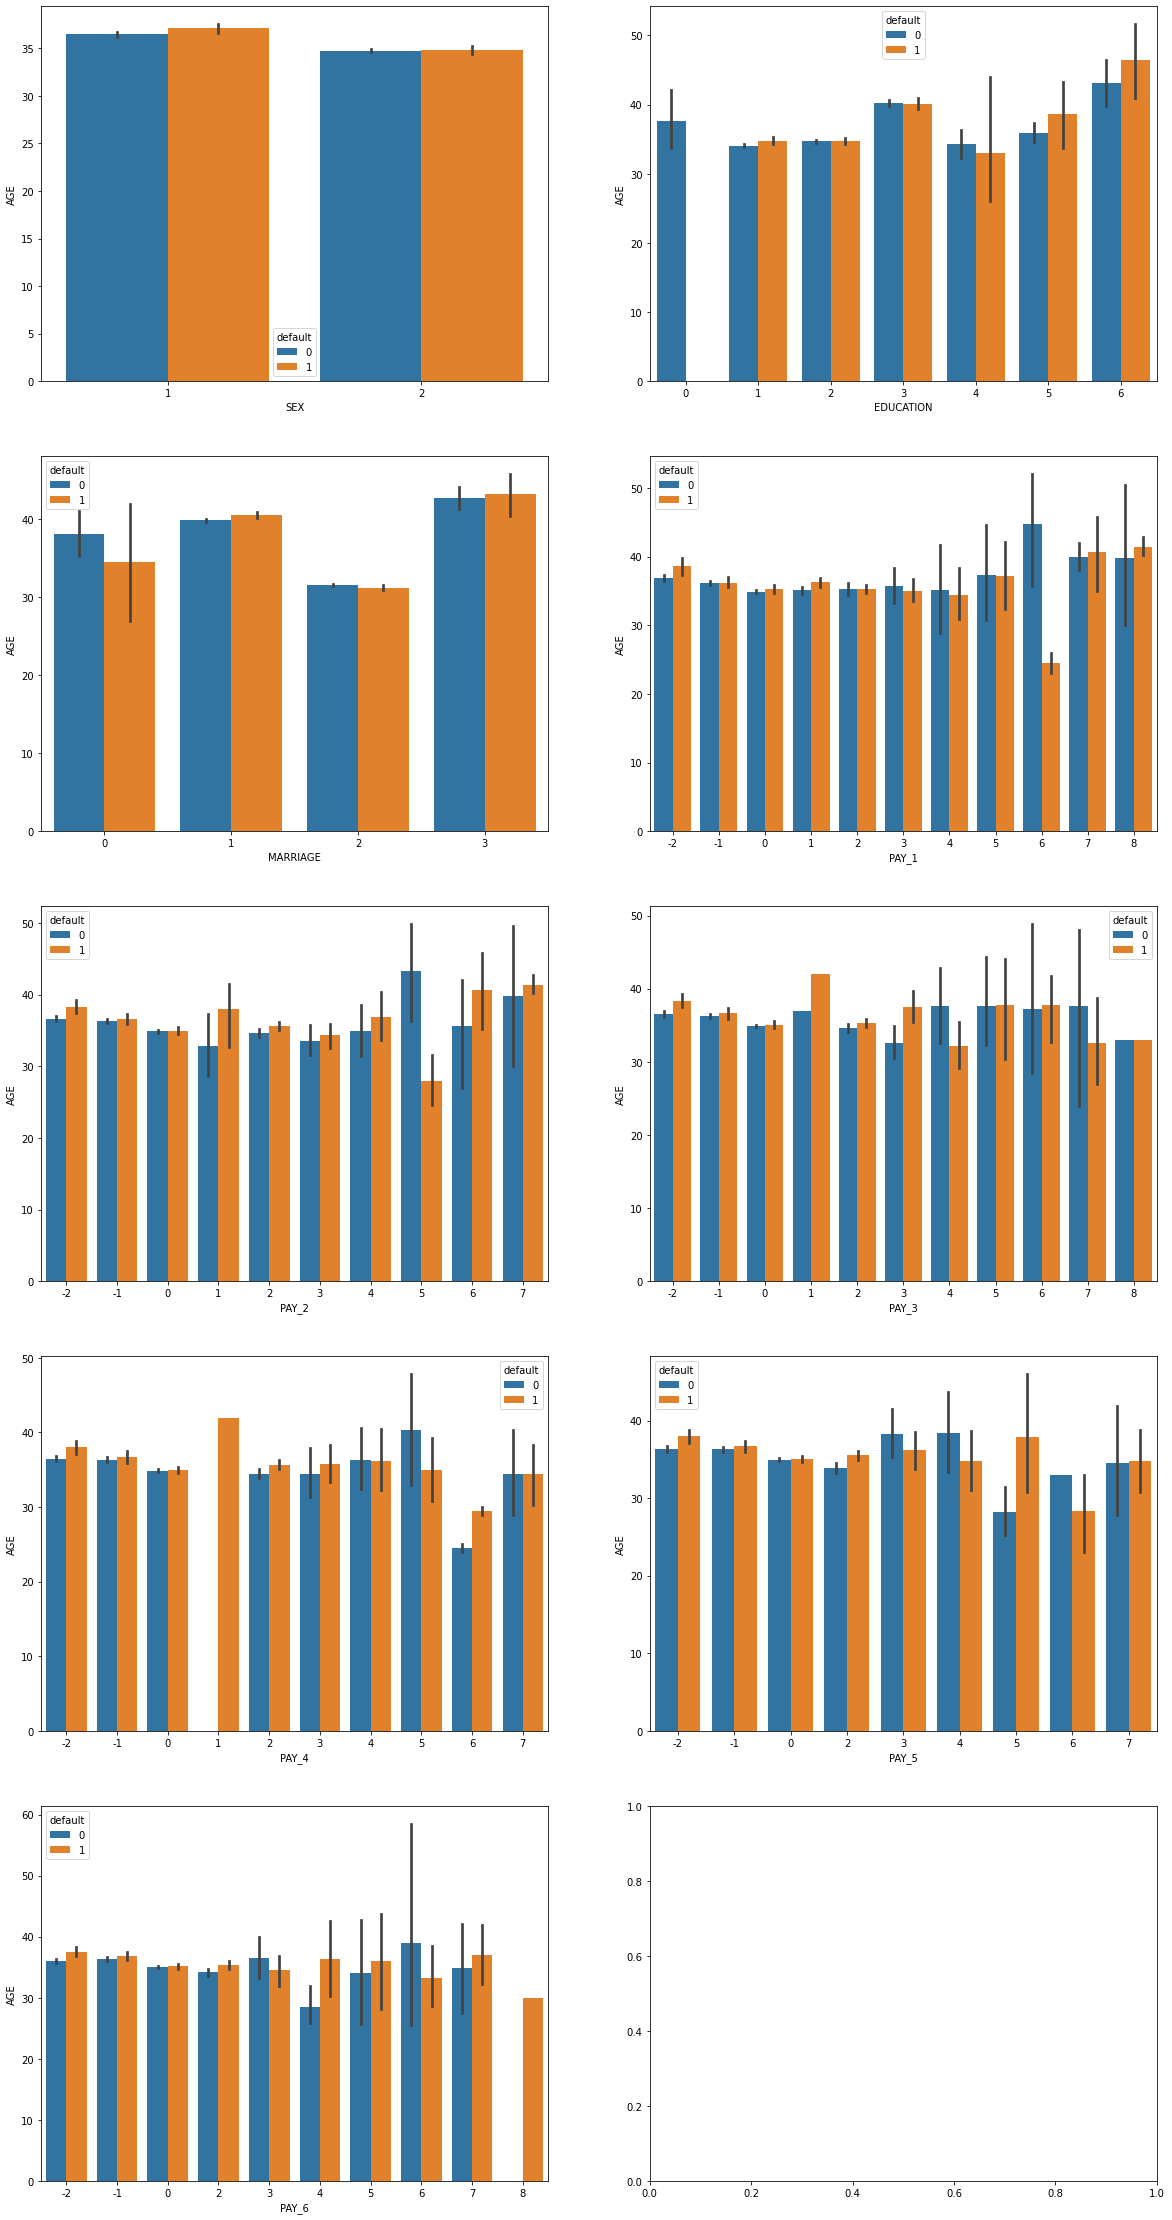

In [67]:
# Grafico 

ncols = 2 
nrows = int(np.ceil(len(data_train[var_categ].columns.values)/ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))
axs = ax.flatten()

for i,c in enumerate(var_categ):

    sns.barplot(data=data_train, x=c, y="AGE", hue="default", ax = axs[i])
    #axs[i].set_title("grafica variable: {}".format(c))

Según el análisis preliminar hay categorias que no estan documentadas, para las que hay que determinar un curso de acción.

In [68]:
data_train[var_cont].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,19199.000000,19199.000000,19199.000000,19199.000000,1.919900e+04,19199.000000,19199.000000,19199.000000,19199.000000,1.919900e+04,19199.000000,19199.000000,19199.000000,19199.000000
mean,167264.424189,35.484348,51039.577322,49032.712329,4.697210e+04,43227.804521,40361.107141,39000.315173,5620.931299,5.956795e+03,5219.914110,4914.133184,4849.605917,5114.730923
std,129732.975552,9.197402,73530.921163,71027.002951,6.982228e+04,64343.973659,60694.859580,59465.813171,16639.820942,2.413026e+04,17755.914586,16280.270269,15692.645031,17024.830375
min,10000.000000,21.000000,-154973.000000,-69777.000000,-6.150600e+04,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3516.000000,2910.000000,2.642000e+03,2311.500000,1721.500000,1239.500000,1000.000000,8.270000e+02,390.000000,300.000000,240.500000,148.000000
50%,140000.000000,34.000000,22291.000000,21127.000000,2.005700e+04,19048.000000,18135.000000,17124.000000,2102.000000,2.011000e+03,1781.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.500000,66972.500000,64244.000000,6.034900e+04,54446.500000,50481.000000,49563.000000,5000.000000,5.000000e+03,4497.500000,4007.000000,4030.000000,4000.000000
max,800000.000000,79.000000,746814.000000,743970.000000,1.664089e+06,706864.000000,823540.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,443001.000000


#### Variables Continuas
Graficas correspondientes a las variables continuas del set de datos

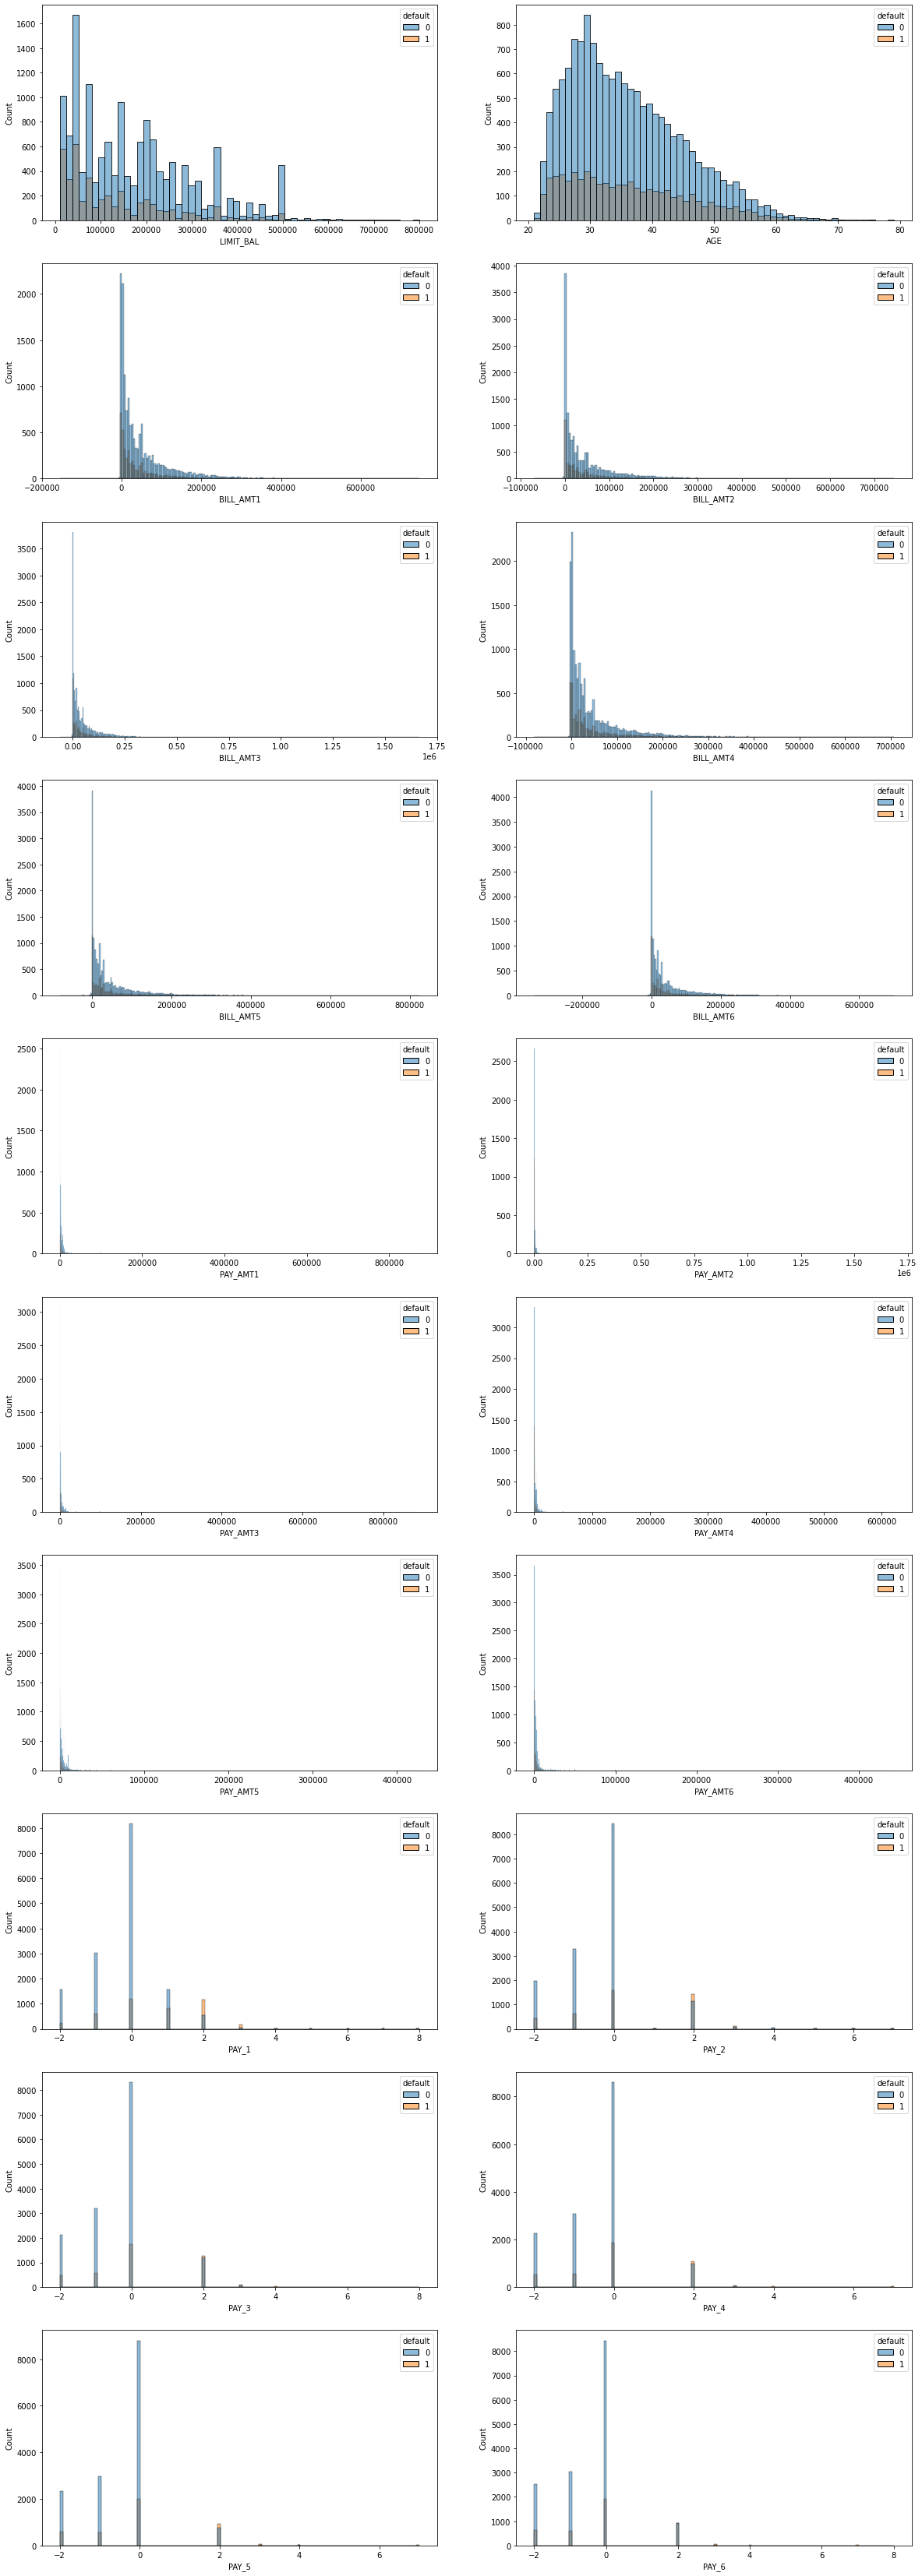

In [69]:
new_var_cont = var_cont + ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

ncols = 2 
nrows = int(np.ceil(len(data_train[new_var_cont].columns.values)/ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 60))
axs = ax.flatten()

for i,c in enumerate(new_var_cont):

    sns.histplot(data=data_train, x=c, hue="default", ax = axs[i])
    #sns.boxplot(data=data_train, y=c, x="default", ax = axs[i])

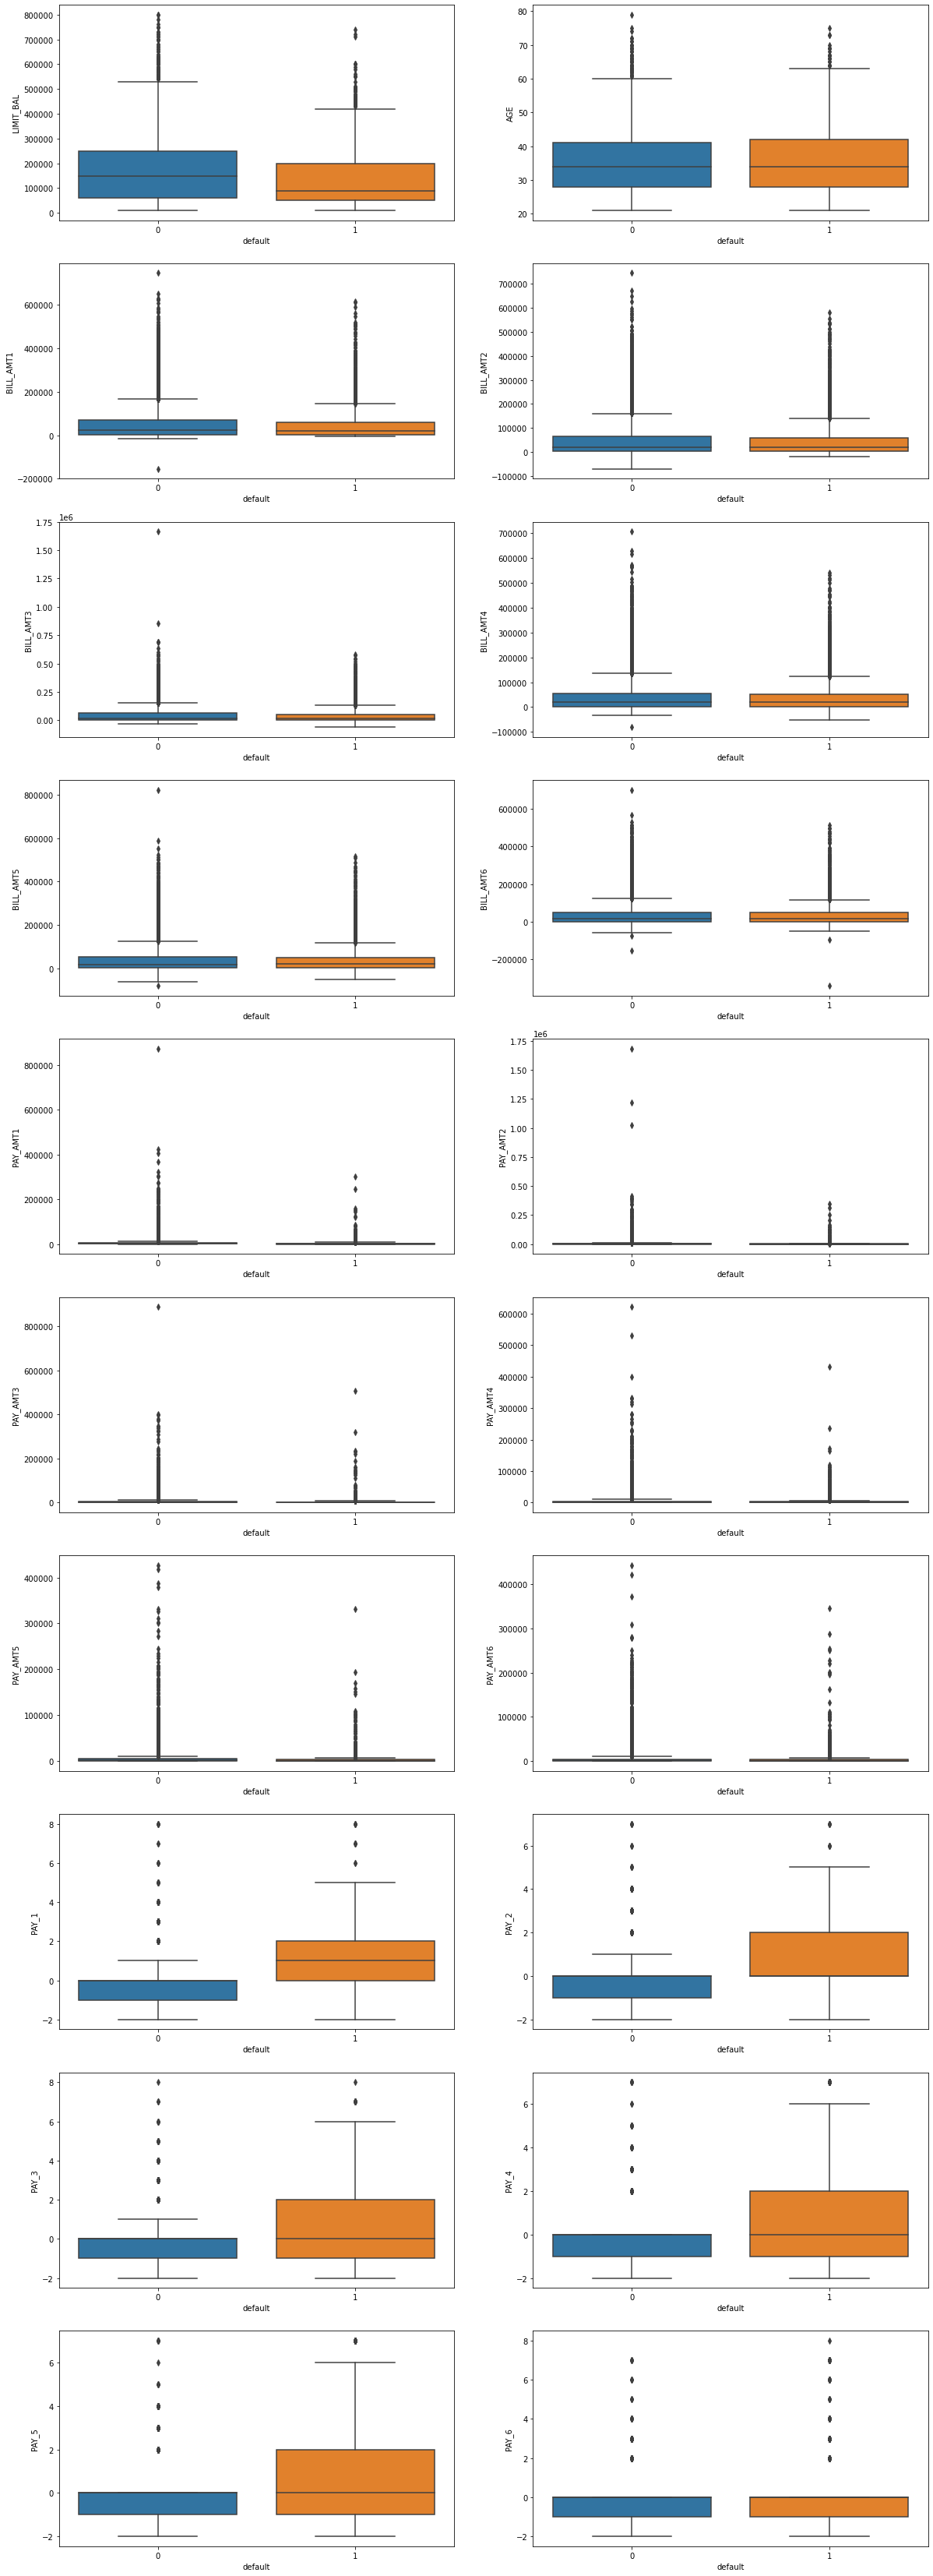

In [70]:
new_var_cont = var_cont + ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

ncols = 2 
nrows = int(np.ceil(len(data_train[new_var_cont].columns.values)/ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 60))
axs = ax.flatten()

for i,c in enumerate(new_var_cont):

    #sns.histplot(data=data_train, x=c, hue="default", ax = axs[i])
    sns.boxplot(data=data_train, y=c, x="default", ax = axs[i])

<AxesSubplot:>

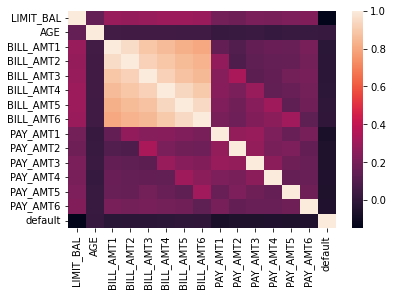

In [71]:
sns.heatmap(data_train[var_cont+["default"]].corr())

## Análisis de variables preliminar

La data de esta competencia es de clientes de un crédito financiero, y describe su comportamiento a través del tiempo. La variable $default.payment.next.month$, renombrada a $default$, contiene la data de personas que han incumplido el compromiso de pago por verse sin la capacidad para hacerlo. En este orden de ideas, el objetivo de este trabajo es hallar un modelo que permita predecir la probabildad de que una persona haga defult de acuerdo al conjunto de variables en la data. Estas se describen a continuación. 

- LIMIT_BAL: Balance del crédito concedido en dólares (incluye crédito individual y familiar/suplementario)
- SEX: Sexo (1=masculino, 2=femenino)
- EDUCATION: (1=posgrado, 2=universitario, 3=bachillerato, 4=otros, 5=desconocido, 6=desconocido)
- MARRIAGE: Estado civil (1=casado, 2=soltero, 3=otros)
- AGE: Edad en años
- PAY_0: Estado de reembolso en septiembre de 2005 (-1=paga debidamente, 1=retraso de pago de un mes, 2=retraso de pago de dos meses, ... 8=retraso de pago de ocho meses, 9=retraso de pago de nueve meses y más)
- PAY_2: Estado de pago en agosto de 2005 (escala idéntica a la anterior)
- PAY_3: Estado de pago en julio de 2005 (escala idéntica a la anterior)
- PAGO_4: Estado del pago en junio de 2005 (escala idéntica a la anterior)
- PAY_5: Situación del pago en mayo de 2005 (escala idéntica a la anterior)
- PAY_6: Estado del pago en abril de 2005 (escala idéntica a la anterior)
- BILL_AMT1: Balance de la factura en septiembre de 2005 (dólares) Cuando la variable BILL_AMT{n} tiene un valor negativo indica que la deuda tiene un saldo a favor, por lo que se puede interpretar que se pagó mas de la cuenta.
- BILL_AMT2: Balance de la factura en agosto de 2005 (dólares)
- BILL_AMT3: Balance del extracto de cuenta de julio de 2005 (dólares)
- BILL_AMT4: Balance del extracto de cuenta de junio de 2005 (dólares)
- BILL_AMT5: Balance de la factura de mayo de 2005 (dólares)
- BILL_AMT6: Balance del extracto de cuenta de abril de 2005 (dólares)
- PAY_AMT1: Balance del pago anterior en septiembre de 2005 (dólares)
- PAY_AMT2: Balance del pago anterior en agosto de 2005 (dólares)
- PAY_AMT3: Balance del pago anterior en julio de 2005 (dólares)
- PAY_AMT4: Balance del pago anterior en junio de 2005 (dólares)
- PAY_AMT5: Balance del pago anterior en mayo de 2005 (dólares)
- PAY_AMT6: Balance del pago anterior en abril de 2005 (en dólares)
- default.payment.next.month (variable de respuesta): Incapacidad de pago (1=sí, 0=no)

Como se puede ver en el heatmap, existe una  alta correlación entre las variables BILL_AMT{n}. Esto puede ser debido a la consistencia en el comportamiento de los clientes, ya que es lógico que el valor que paga la mayoría de los clientes en un mes sea similar al valor que debe pagar en los meses posteriores o anteriores. Estas variables son muy constantes en el tiempo para los clientes en general, y los que hacen default son los atípicos. Esto también se corrobora en el hecho de que la clase positiva (incapaz de pagar) conrresponda tan solo al 22% de los datos. Por lo demás, se detectaron correlaciones bastante bajas.

Por otra parte, se puede ver ne los gráficos de distribución y en los boxplots, que las variables están marcadamente sesgadas a la izquierda, con muchos valores extremos, pues existen individuos en la población que deben mucho más dinero, o que pagan mucho más al mes que todos los demás. La mayoría de los clientes se encuentran concentrados en valores a la izquierda de los gráficos de distribución, en valores que se pueden considerar "promedio" o "convencionales" de deuda. Esto también es típico de los datos financieros.

Por último, se resalta que la data no tiene valores nulos, de modo que no es necesario realizar imputación de datos. Sin embargo, se resalta que las variables están desbalanceadas, aunque no marcadamente. También, se tienen varias variables categóricas, como las de PAY_{n}, que implicarán un ejercicio de transformación para generar dummies.  

# Transformacion de varaibles

Esta función tiene como objetivo aplcar una serie de transformaciones a las variables, de modo que se obtenga un set de datos más fácilmente modelable. En particular se aplicarán las siguientes manipulaciones:

- Se transformará la variable de BILL_AMT{n} en dos variables: Una binaria que indica si el valor es negativo (saldo a favor) y otra que tendrá el valor del saldo a favor.
- Para suavizar las curvas de distribución con sesgos pronunciados, se va a aplicar logaritmo natural a las variables que tienen este comportamiento. Para esto se les debe sumar 1, de modo que nunca tomen el valor de 0.
- Se crean las variables 
    - IS_REFUND{i}: Indica cuando se tiene saldo a favor
    - REFUND_AMT{i}: Indica de cúanto es el saldo a favor
    - IS_BILLED{i}: Indica si la persona debe dinero o no
    - POS_BILL_AMT{i}: La cantidad que se debe en total
    - DEFAULT_ON_{i}: Si se dejó de pagar en el mes i
    - PROPORTION_BILL_LIMIT: La proporción de la deuda acumulada sobre el total de deuda
    - PROPORTION_BILL_PAYED: La proporción de deuda pagada del total
    - CONSECUTIVE_DEFAULTS: Si el cliente tuvo o no incapacidad de pago en meses consecutivos
    - MEAN_BILL_AMT: El promedio de la deuda mensual en todos los periodos 
    - TREND_BILL_AMT: La tendencia de pago, expresada como la proporción de deuda acumulada sobre la deuda total
    - TREND_PAY_AMT: La tendencia de pago, expresada como el balance del pago anterior en septiembre de 2005 sobre la deuda total
    - MEAN_PAY_AMT: El promedio de pago por mes

In [72]:
def transform_x(X_in):
    
    for i in np.arange(1,6):
        X_in["DIFF_BILL_PAY_{i}".format(i=i)] = X_in["BILL_AMT{i}".format(i=i+1)] - X_in["PAY_AMT{i}".format(i=i)]
        #X_in["DIFF_BILL_PAY_{i}".format(i=i)] = np.log(X_in["DIFF_BILL_PAY_{i}".format(i=i)]+1)
        X_in["CHANGE_PAY_STATUS_{i}".format(i=i)] = X_in["PAY_{i}".format(i=i)] - X_in["PAY_{i}".format(i=i+1)]
    
    for i in np.arange(1,7):
        X_in["IS_REFUND{i}".format(i=i)] = (X_in["BILL_AMT{i}".format(i = i)] < 0).astype(int)
        X_in["REFUND_AMT{i}".format(i=i)] = X_in["BILL_AMT{i}".format(i=i)].apply(lambda x : x*-1 if x < 0 else 0)
        X_in["IS_BILLED{i}".format(i=i)] = (X_in["BILL_AMT{i}".format(i = i)] != 0).astype(int)
        
        X_in["POS_BILL_AMT{i}".format(i=i)] = X_in["BILL_AMT{i}".format(i=i)].apply(lambda x : x if x > 0 else 0)
        X_in = X_in.drop(columns="BILL_AMT{i}".format(i=i))

        X_in["DEFAULT_ON_{i}".format(i=i)] = (X_in["PAY_{i}".format(i=i)] > 0).astype(int)


    X_in["PROPORTION_BILL_LIMIT"] = X_in["POS_BILL_AMT1"] / X_in["LIMIT_BAL"]
    X_in["PROPORTION_BILL_PAYED"] = X_in["PAY_AMT1"] / (X_in["POS_BILL_AMT2"]+1)
    
    

    # logaritmo
    X_in["LIMIT_BAL"] = np.log(X_in["LIMIT_BAL"] + 1)
    X_in["AGE"] = np.log(X_in["AGE"] + 1)    
    X_in["PROPORTION_BILL_LIMIT"] = np.log(X_in["PROPORTION_BILL_LIMIT"] + 1)
    X_in["PROPORTION_BILL_PAYED"] = np.log(X_in["PROPORTION_BILL_PAYED"] + 1)

    for i in np.arange(1,7):
        X_in["REFUND_AMT{i}".format(i=i)] = np.log(X_in["REFUND_AMT{i}".format(i=i)] + 1)
        X_in["POS_BILL_AMT{i}".format(i=i)] = np.log(X_in["POS_BILL_AMT{i}".format(i=i)] + 1)
        X_in["PAY_AMT{i}".format(i = i)] = np.log(X_in["PAY_AMT{i}".format(i = i)] + 1)

    # feature engineering

    X_in["CONSECUTIVE_DEFAULTS"] = X_in[["DEFAULT_ON_{i}".format(i=x) for x in np.arange(2,7)]].sum(axis=1)

    X_in["MEAN_BILL_AMT"] = X_in[["POS_BILL_AMT{i}".format(i=x) for x in np.arange(2,7)]].mean(axis=1)
    
    c = X_in["MEAN_BILL_AMT"] != 0
    X_in["TREND_BILL_AMT"] = 0
    X_in.loc[c,"TREND_BILL_AMT"] = (X_in.loc[c,"POS_BILL_AMT1"]/X_in.loc[c,"MEAN_BILL_AMT"])

    X_in["TREND_BILL_AMT"] = np.log(X_in["TREND_BILL_AMT"] + 1)
    
    X_in["MEAN_PAY_AMT"] = X_in[["PAY_AMT{i}".format(i=x) for x in np.arange(2,7)]].mean(axis=1)
    c = X_in["MEAN_PAY_AMT"] != 0
    X_in["TREND_PAY_AMT"] = 0
    X_in.loc[c,"TREND_PAY_AMT"] = X_in.loc[c,"PAY_AMT1"]/X_in.loc[c,"MEAN_PAY_AMT"]

    X_in["TREND_PAY_AMT"] = np.log(X_in["TREND_PAY_AMT"] + 1)

    #X_in = X_in.drop(columns=["MEAN_BILL_AMT","MEAN_PAY_AMT"])
    
    

    c = X_in["EDUCATION"].isin([0,5,6])
    X_in.loc[c,"EDUCATION"] = 0

    return X_in

XTrain_transform = transform_x(XTrain)
XTest_transform = transform_x(XTest)

Posterirmente se procedió a obtener las variables dummies, usando OneHotEncoder, que permite aplicar el proceso de creación de variables dummy a dos muestras diferentes. En este caso era necesario hacerlo ya que las variables que generan dummies en la muestra de entrenamiento son de magnitudes diferentes y producen categorías distintas en ambas muestras. Se hizo necesario aplicar las mismas variables dummy provenientes de la muestra de entrenamiento en ambas muestras.  

In [73]:
from sklearn.preprocessing import OneHotEncoder

# get dummies
col_dummies = ['MARRIAGE','EDUCATION','SEX'] + ["PAY_{i}".format(i=x) for x in np.arange(1,7)]

encoder = OneHotEncoder(drop='first',handle_unknown='ignore',
                        categories=[[0, 1, 2, 3],
                                    [0, 1, 2, 3, 4],
                                    [1, 2],
                                    [-2, -1,  0,  1,  2,  3,  4,  5,  6,  7, 8],
                                    [-2, -1,  0,  1,  2,  3,  4,  5,  6,  7, 8],
                                    [-2, -1,  0,  1,  2,  3,  4,  5,  6,  7, 8],
                                    [-2, -1,  0,  1,  2,  3,  4,  5,  6,  7, 8],
                                    [-2, -1,  0,  1,  2,  3,  4,  5,  6,  7, 8],
                                    [-2, -1,  0,  1,  2,  3,  4,  5,  6,  7, 8]])

encoder.fit(XTrain_transform[col_dummies])

XTrain_transform = pd.concat([XTrain_transform,pd.DataFrame(encoder.transform(XTrain_transform[col_dummies]).toarray(), columns = encoder.get_feature_names_out(), index = XTrain_transform.index)], axis = 1)
#XTrain_transform = XTrain_transform.drop(columns=col_dummies)
XTest_transform = pd.concat([XTest_transform,pd.DataFrame(encoder.transform(XTest_transform[col_dummies]).toarray(), columns = encoder.get_feature_names_out(), index = XTest_transform.index)], axis = 1)
#XTest_transform = XTest_transform.drop(columns=col_dummies)

#### Grafica de variables despues de transformacion
Se vuelven a graficar las distribuciones de las variables para validar que las transformaciones realizadas cumplen el efecto deseado de estandarizacion

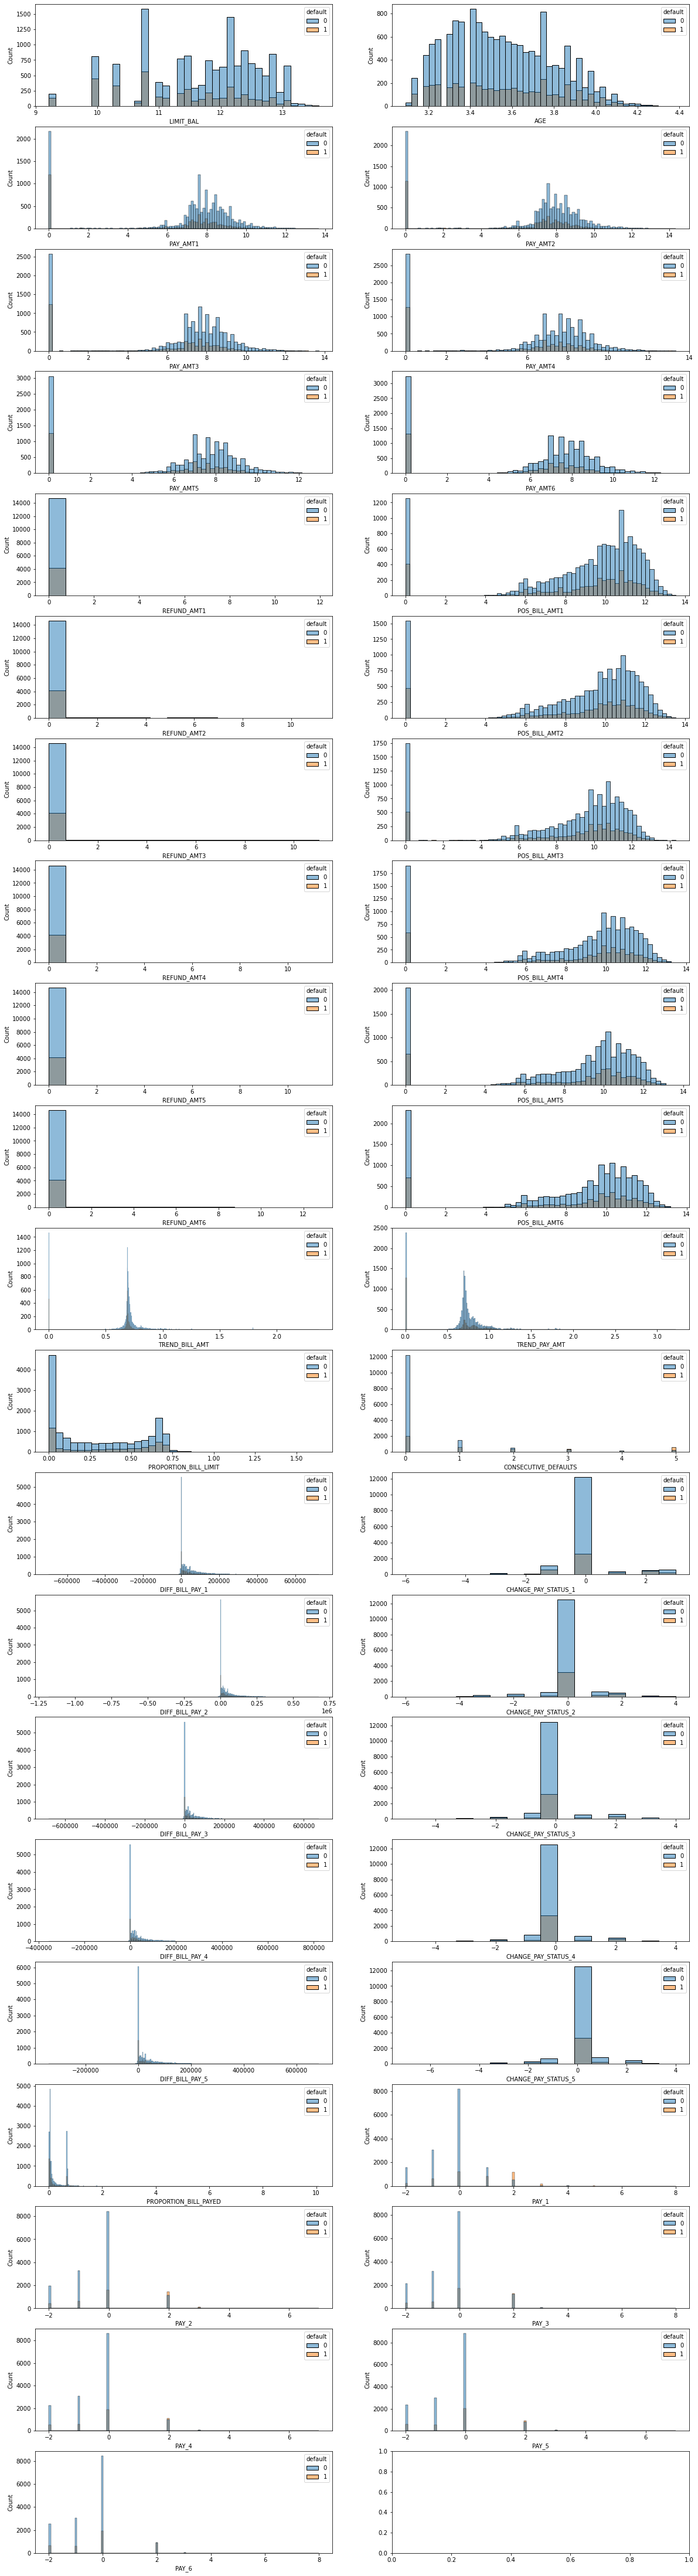

In [74]:
data_train = pd.concat([XTrain_transform,yTrain],axis=1)

var_cont = ['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
            'REFUND_AMT1','POS_BILL_AMT1','REFUND_AMT2', 'POS_BILL_AMT2',
            'REFUND_AMT3', 'POS_BILL_AMT3', 'REFUND_AMT4', 'POS_BILL_AMT4',
            'REFUND_AMT5', 'POS_BILL_AMT5', 'REFUND_AMT6', 'POS_BILL_AMT6', 'TREND_BILL_AMT', 'TREND_PAY_AMT',
            'PROPORTION_BILL_LIMIT', 'CONSECUTIVE_DEFAULTS','DIFF_BILL_PAY_1', 'CHANGE_PAY_STATUS_1', 'DIFF_BILL_PAY_2',
            'CHANGE_PAY_STATUS_2', 'DIFF_BILL_PAY_3', 'CHANGE_PAY_STATUS_3',
            'DIFF_BILL_PAY_4', 'CHANGE_PAY_STATUS_4', 'DIFF_BILL_PAY_5',
            'CHANGE_PAY_STATUS_5','PROPORTION_BILL_PAYED']
# 'PROPORTION_BILL_PAYED'

new_var_cont = var_cont + ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

ncols = 2 
nrows = int(np.ceil(len(data_train[new_var_cont].columns.values)/ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 80))
axs = ax.flatten()

for i,c in enumerate(new_var_cont):

    sns.histplot(data=data_train, x=c, hue="default", ax = axs[i])
    #sns.boxplot(data=data_train, y=c, x="default", ax = axs[i])

<AxesSubplot:>

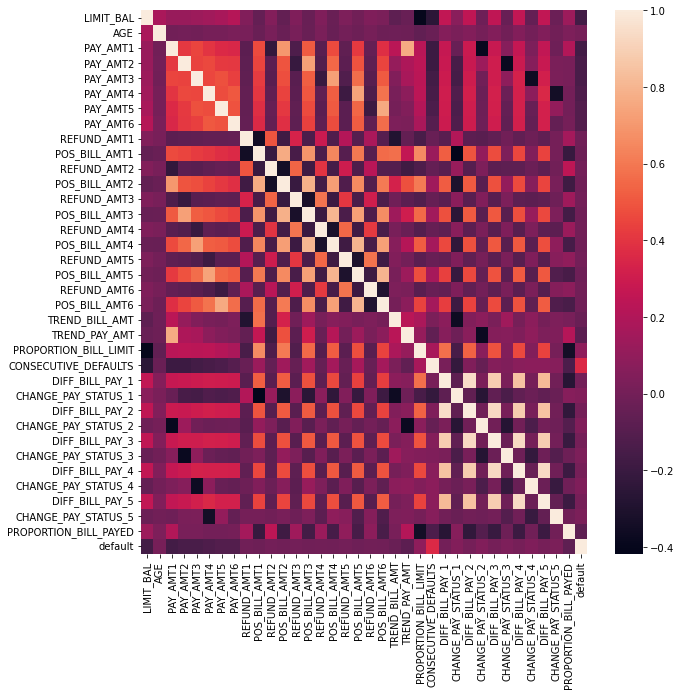

In [75]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_train[var_cont+["default"]].corr(), ax=ax)

<AxesSubplot:>

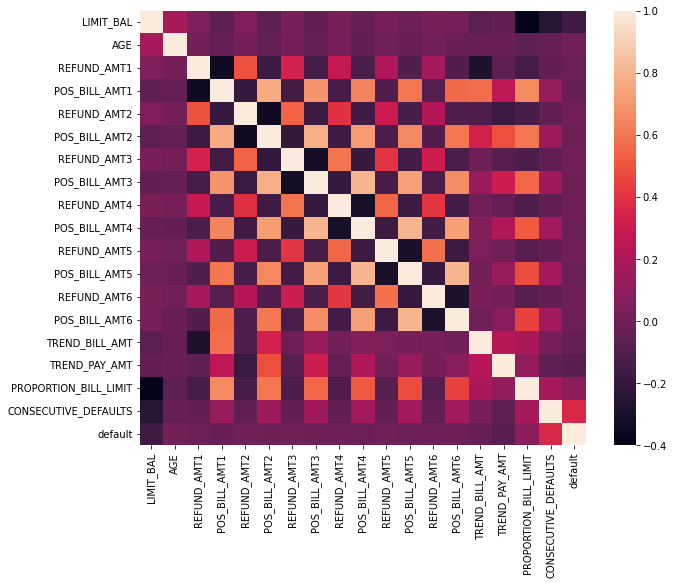

In [76]:
data_train = pd.concat([XTrain_transform,yTrain],axis=1)


var_cont = ['LIMIT_BAL', 'AGE', 'REFUND_AMT1','POS_BILL_AMT1','REFUND_AMT2', 'POS_BILL_AMT2',
            'REFUND_AMT3', 'POS_BILL_AMT3', 'REFUND_AMT4', 'POS_BILL_AMT4',
            'REFUND_AMT5', 'POS_BILL_AMT5', 'REFUND_AMT6', 'POS_BILL_AMT6', 'TREND_BILL_AMT', 'TREND_PAY_AMT',
            'PROPORTION_BILL_LIMIT', 'CONSECUTIVE_DEFAULTS']

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data_train[var_cont+["default"]].corr(), ax=ax)

In [77]:
XTrain_transform.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
count,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,...,19199.000000,19199.000000,19199.0,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000,19199.000000
mean,11.660909,1.605604,1.797698,1.553675,3.566577,-0.022501,-0.132403,-0.162300,-0.219334,-0.266003,...,0.189697,0.539872,0.0,0.095005,0.005729,0.001458,0.000469,0.000833,0.001302,0.000052
std,0.942794,0.488733,0.733333,0.521565,0.244200,1.123722,1.195179,1.197548,1.169226,1.135302,...,0.392072,0.498421,0.0,0.293229,0.075478,0.038162,0.021647,0.028857,0.036063,0.007217
min,9.210440,1.000000,0.000000,0.000000,3.091042,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.819798,1.000000,1.000000,1.000000,3.367296,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.849405,2.000000,2.000000,2.000000,3.555348,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.388398,2.000000,2.000000,2.000000,3.749435,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,13.592368,2.000000,4.000000,3.000000,4.382027,8.000000,7.000000,8.000000,7.000000,7.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Como se puede ver, las variables presentan ahora un comportamiento mucho más cercano a la normalidad. Fue posible deshacerse del pronunciado sesgo que tenían las variables antes y se pueden considerar de forma más estándar. Por otro lado, aunque se hallaron correlaciones altas, se considera que las variables tienen información relevante para el problema. 

## Seleccion de variables

Se planea utilizar el re

In [78]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE

### Metodo filtrado

Text(0, 0.5, 'MI scores')

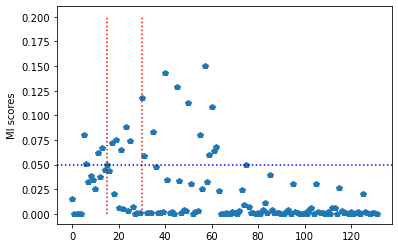

In [79]:
mu_inf = mutual_info_regression(XTrain_transform, yTrain,discrete_features=True,n_neighbors=4)

plt.plot(mu_inf,'p')
plt.vlines(x=[15,30],ymin=0,ymax=np.max(mu_inf)+0.05,ls=':',colors='r')
plt.axhline(y=0.05,ls=':',color='b')  #Threshold
plt.ylabel('MI scores')

In [80]:
select_var_filtrado = XTrain_transform.columns[mu_inf > 0]
select_var_filtrado

XTrain_transform_filtrado = XTrain_transform[select_var_filtrado]
XTest_transform_filtrado = XTest_transform[select_var_filtrado]

### Metodos de envoltura

In [81]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=0,max_depth = 2, n_estimators=200)  #se usa random Forest como el algoritmo predictivo
selector = RFE(estimator, n_features_to_select=114, step=1) #Se define step=1, pero lo puede cambiar para que sea más rápido
selector = selector.fit(XTrain_transform, yTrain) # esto puede tardar algunos minutos

#selector.support_  #Conjunto de variables seleccionadas

select_var_envoltura = XTrain_transform.columns[selector.support_]

XTrain_transform_envoltura = XTrain_transform[select_var_envoltura] 
XTest_transform_envoltura = XTest_transform[select_var_envoltura]

# MODELOS

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn import metrics


from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.svm import SVC

In [83]:
def graficas_roc_test_train(Xtrain, yTrain, XTest, yTest, model, grafica=True):

    # Train
    prediccionMdl_Train = model.predict_proba(Xtrain)[:,1]
    fpr_train, tpr_train, thresholds = metrics.roc_curve(yTrain, prediccionMdl_Train, pos_label=1)
    AUC_train=metrics.auc(fpr_train, tpr_train)
    

    # TEST
    prediccionMdl_Test = model.predict_proba(XTest)[:,1]
    fpr_test, tpr_test, thresholds = metrics.roc_curve(yTest, prediccionMdl_Test, pos_label=1)
    AUC_test = metrics.auc(fpr_test, tpr_test)
    

    if grafica:

        fig, ax = plt.subplots(ncols=2, figsize=(16, 8))    
        # Train
        ax[0].set_title('Receiver Operating Characteristic')
        ax[0].plot(fpr_train, tpr_train, 'b', label = 'AUC = %0.2f' % AUC_train)
        ax[0].legend(loc = 'lower right')
        ax[0].plot([0, 1], [0, 1],'r--')
        ax[0].axis(xmin=-0.01,xmax=1,ymin=0,ymax=1.05)
        ax[0].set_ylabel('True Positive Rate')
        ax[0].set_xlabel('False Positive Rate')

        # Test
        ax[1].set_title('Receiver Operating Characteristic')
        ax[1].plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % AUC_test)
        ax[1].legend(loc = 'lower right')
        ax[1].plot([0, 1], [0, 1],'r--')
        ax[1].axis(xmin=-0.01,xmax=1,ymin=0,ymax=1.05)
        ax[1].set_ylabel('True Positive Rate')
        ax[1].set_xlabel('False Positive Rate')
        
    print("AUC Train: {}".format(AUC_train))
    print("AUC Test: {}".format(AUC_test))

    return AUC_train, AUC_test


def metricas_modelo(XTest, yTest, model):
    
    predict=model.predict(XTest)
    error=0
    for i in range(0,len(yTest)):
        if(yTest.iloc[i]!=predict[i]):
            error+=1/len(yTest)
    print('El error de clasificación para modelo en la muestra de test es:{s}'.format(s=error))
    
    print(confusion_matrix(y_true=yTest, y_pred=predict))
    accuracy = accuracy_score(y_true=yTest, y_pred=predict)
    print("accuracy : {}".format(accuracy))
    precision = precision_score(y_true=yTest.values, y_pred=predict)
    print("precision : {}".format(precision))

    return accuracy, precision, error

In [89]:
AUC_train_dict = {}
AUC_test_dict = {}
accuracy_dict = {}
precision_dict = {}
error_dict = {}

### Modelos probados
Inicialmente se aplicaron todos los modelos vistos en clase y se midio su desempeño con las funciones declaradas arriba, los modelos probados fueron:
- LDA
- Naive Bayes
- Random Forest
- Decission Tree
- Gradient Boosting
- SVM
- Kneighbors 
- Redes Neuronales
- Logistic GAM

siendo el **Gradient Boosting** el que tenia mejor desempeño individual seguido por los otros modelos basados en arboles

por tal motivo se procedio a hacer seleccion de varaibles calibrando con el modelo de Gradient Boosting 
tambien se probaron otras estrategias como PCA, obteniendo una pequeña mejora en los desempeños individuales en el modelo de GradientBoosting, sn embargo no se aplico al final del proyecto ya que se obtenian resultados igual de buenos sin la necesidad de aplicar la transformacion 

## Random Forest

AUC Train: 0.86351189198948
AUC Test: 0.7860861385569853
El error de clasificación para modelo en la muestra de test es:0.1791666666666691
[[3529  183]
 [ 677  411]]
accuracy : 0.8208333333333333
precision : 0.6919191919191919


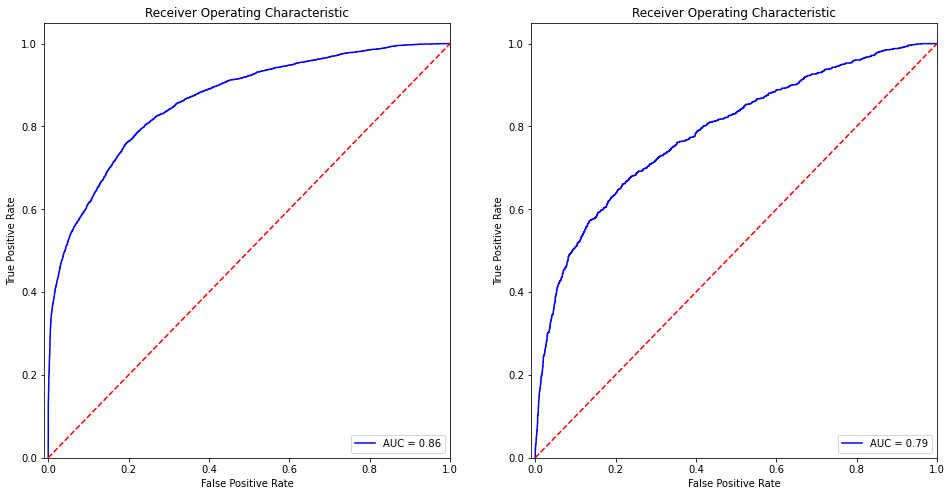

In [90]:
clfRF = RandomForestClassifier(random_state=0,max_depth = 10, n_estimators=500)
clfRF.fit(XTrain_transform, yTrain)

AUC_train_RF, AUC_test_RF = graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clfRF)
accuracy_RF, precision_RF, error_RF = metricas_modelo(XTest_transform, yTest, clfRF)


AUC_train_dict["RandomForest"] = AUC_train_RF
AUC_test_dict["RandomForest"] = AUC_test_RF
accuracy_dict["RandomForest"] = accuracy_RF
precision_dict["RandomForest"] = precision_RF
error_dict["RandomForest"] = error_RF

Para tener una mayor intuicion sobre que variables tienen mejor desempeño, se grafico la importancia de las variables para el modelo de RandomForest, si bien estas variables puede no ser las mas significativas para todos los modelos; graficar su importancia nos puede ayudar a tener una mejor intuicion

C:\Users\paulg\AppData\Local\Temp\ipykernel_8552\2217273997.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ejeX, rotation = 90)


[Text(0, 0, 'LIMIT_BAL'),
 Text(1, 0, 'SEX'),
 Text(2, 0, 'EDUCATION'),
 Text(3, 0, 'MARRIAGE'),
 Text(4, 0, 'AGE'),
 Text(5, 0, 'PAY_1'),
 Text(6, 0, 'PAY_2'),
 Text(7, 0, 'PAY_3'),
 Text(8, 0, 'PAY_4'),
 Text(9, 0, 'PAY_5'),
 Text(10, 0, 'PAY_6'),
 Text(11, 0, 'PAY_AMT1'),
 Text(12, 0, 'PAY_AMT2'),
 Text(13, 0, 'PAY_AMT3'),
 Text(14, 0, 'PAY_AMT4'),
 Text(15, 0, 'PAY_AMT5'),
 Text(16, 0, 'PAY_AMT6'),
 Text(17, 0, 'DIFF_BILL_PAY_1'),
 Text(18, 0, 'CHANGE_PAY_STATUS_1'),
 Text(19, 0, 'DIFF_BILL_PAY_2'),
 Text(20, 0, 'CHANGE_PAY_STATUS_2'),
 Text(21, 0, 'DIFF_BILL_PAY_3'),
 Text(22, 0, 'CHANGE_PAY_STATUS_3'),
 Text(23, 0, 'DIFF_BILL_PAY_4'),
 Text(24, 0, 'CHANGE_PAY_STATUS_4'),
 Text(25, 0, 'DIFF_BILL_PAY_5'),
 Text(26, 0, 'CHANGE_PAY_STATUS_5'),
 Text(27, 0, 'IS_REFUND1'),
 Text(28, 0, 'REFUND_AMT1'),
 Text(29, 0, 'IS_BILLED1'),
 Text(30, 0, 'POS_BILL_AMT1'),
 Text(31, 0, 'DEFAULT_ON_1'),
 Text(32, 0, 'IS_REFUND2'),
 Text(33, 0, 'REFUND_AMT2'),
 Text(34, 0, 'IS_BILLED2'),
 Text(35, 0, 

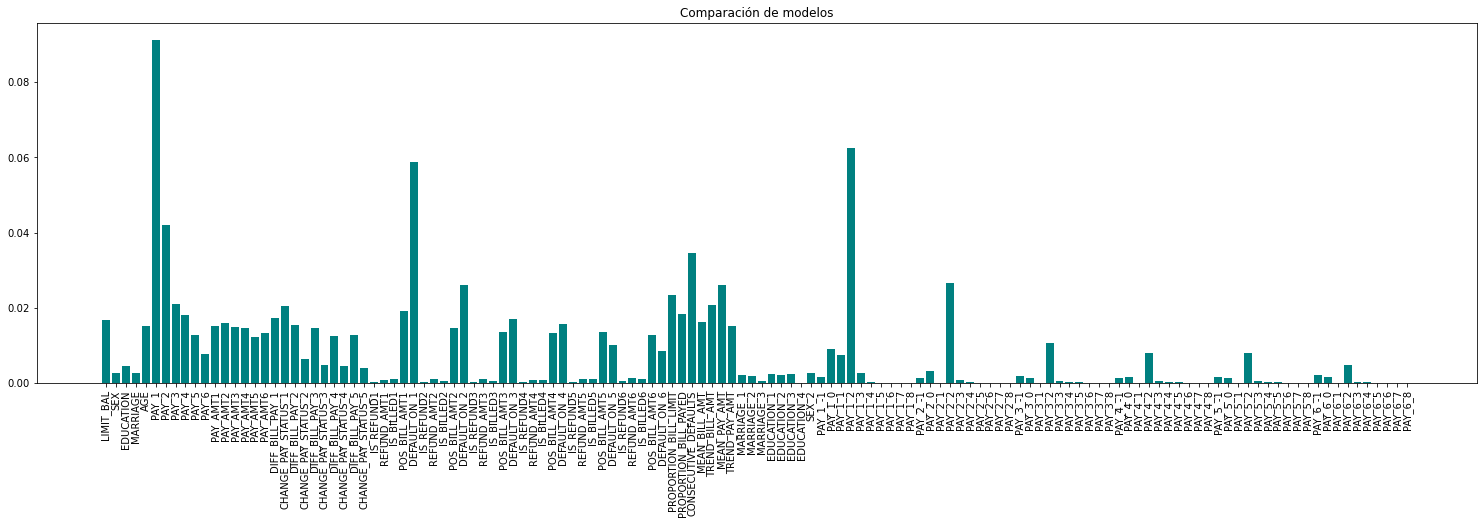

In [91]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")

ejeX = XTrain_transform.columns.values
ejeY = clfRF.feature_importances_

ax.bar(ejeX,ejeY, color='teal')
ax.set_xticklabels(ejeX, rotation = 90)

## Gradient Boosting

AUC Train: 0.7939549513494782
AUC Test: 0.789131210977117
El error de clasificación para modelo en la muestra de test es:0.18062500000000248
[[3548  164]
 [ 703  385]]
accuracy : 0.819375
precision : 0.7012750455373407


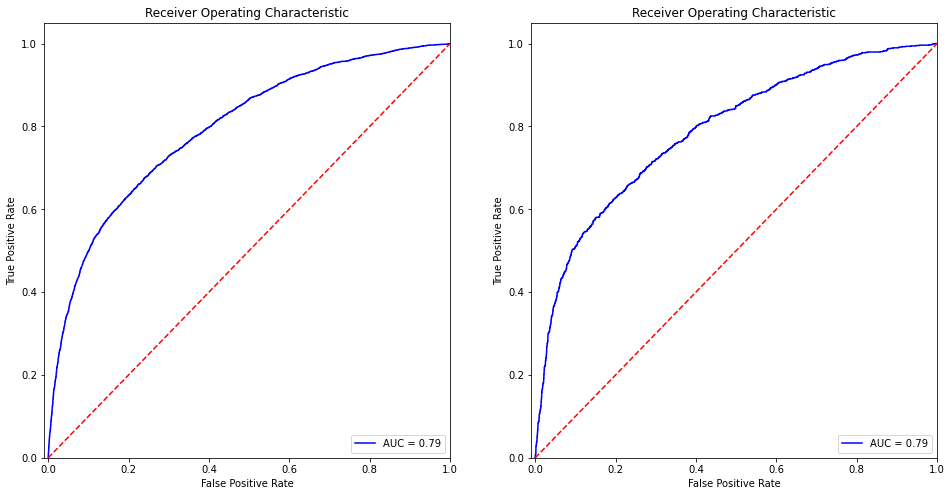

In [92]:
clfGB= GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000, loss='exponential')
clfGB.fit(XTrain_transform, yTrain)

AUC_train_GB, AUC_test_GB = graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clfGB)
accuracy_GB, precision_GB, error_GB = metricas_modelo(XTest_transform, yTest, clfGB)

AUC_train_dict["GradientBoosting"] = AUC_train_GB
AUC_test_dict["GradientBoosting"] = AUC_test_GB
accuracy_dict["GradientBoosting"] = accuracy_GB
precision_dict["GradientBoosting"] = precision_GB
error_dict["GradientBoosting"] = error_GB


## Seleccion variables

Text(0, 0.5, 'MI scores')

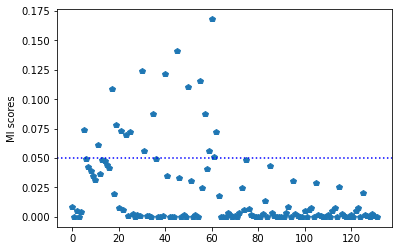

In [84]:
from sklearn.feature_selection import mutual_info_regression

mu_inf=mutual_info_regression(XTrain_transform, yTrain,discrete_features=True,n_neighbors=9)

plt.plot(mu_inf,'p')
plt.axhline(y=0.05,ls=':',color='b')  #Threshold
plt.ylabel('MI scores')

In [85]:
acc_arr = []
AUC_train_arr = []
AUC_test_arr = []
precision_arr = []
error_clasifica_arr  = []
n_estimators_arr = len(mu_inf)-1

for i in np.arange(1,n_estimators_arr):
    print(i)
    
    c_val = (mu_inf <= np.sort(mu_inf)[i])

    clfGB= GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000, loss='exponential')
    clfGB.fit(XTrain_transform.loc[:,c_val], yTrain)

    AUC_train, AUC_test = graficas_roc_test_train(XTrain_transform.loc[:,c_val], yTrain, XTest_transform.loc[:,c_val], yTest, clfGB,grafica=False)
    accuracy, precision, error = metricas_modelo(XTest_transform.loc[:,c_val], yTest, clfGB)

    acc_arr.append(accuracy)
    AUC_train_arr.append(AUC_train)
    AUC_test_arr.append(AUC_test)
    precision_arr.append(precision)
    error_clasifica_arr.append(error)

1
AUC Train: 0.5514385166790785
AUC Test: 0.5464498585668104
El error de clasificación para modelo en la muestra de test es:0.22708333333333688
[[3709    3]
 [1087    1]]
accuracy : 0.7729166666666667
precision : 0.25
2
AUC Train: 0.5514385166790785
AUC Test: 0.5464498585668104
El error de clasificación para modelo en la muestra de test es:0.22708333333333688
[[3709    3]
 [1087    1]]
accuracy : 0.7729166666666667
precision : 0.25
3
AUC Train: 0.5514385166790785
AUC Test: 0.5464498585668104
El error de clasificación para modelo en la muestra de test es:0.22708333333333688
[[3709    3]
 [1087    1]]
accuracy : 0.7729166666666667
precision : 0.25
4
AUC Train: 0.5514385166790785
AUC Test: 0.5464498585668104
El error de clasificación para modelo en la muestra de test es:0.22708333333333688
[[3709    3]
 [1087    1]]
accuracy : 0.7729166666666667
precision : 0.25
5
AUC Train: 0.5514385166790785
AUC Test: 0.5464498585668104
El error de clasificación para modelo en la muestra de test es:0.22

La metrica utilizada para la seleccion de variables fue **accuracy** ya que determinamos que es improtante que las predicciones de verdaderos postivos se mantuviesen altas.

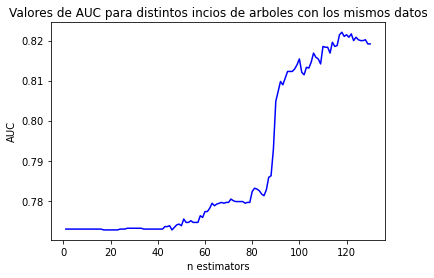

In [86]:
plt.title('Valores de AUC para distintos incios de arboles con los mismos datos')
plt.plot(np.arange(1,n_estimators_arr), acc_arr, 'b',)
plt.ylabel('AUC')
plt.xlabel('n estimators')
plt.show()

In [98]:
seleccion_variables_arg_max = np.argmax(acc_arr) + 1 
seleccion_variables_arg_max

118

El desempeño de los modeos individuales habia llegado a un tope que no mejoraba signifiativamente con la calibracion de hiper parametros, por tal motivo se comenzaron a probar metodos que integran el resultado de varios modelos como 

- Voting Classifier
- Stacking Classifier


Iniicalmente para estos metodos se escogen como modelos principales aqellosque habian tenido un buen resultado en las ejecuciones individuales

### Voting Classifier

AUC Train: 0.8339750705678444
AUC Test: 0.7900255679117013
El error de clasificación para modelo en la muestra de test es:0.17875000000000243
[[3538  174]
 [ 684  404]]
accuracy : 0.82125
precision : 0.698961937716263


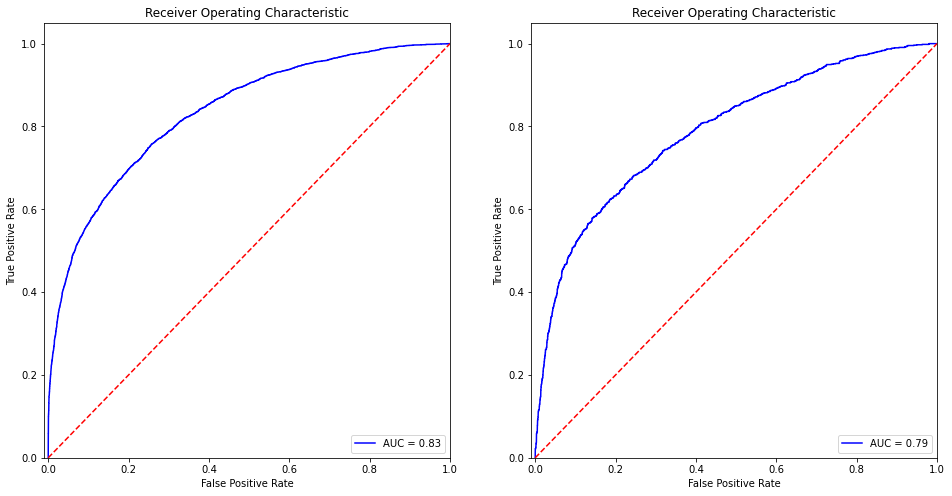

In [93]:
from sklearn.ensemble import VotingClassifier

clf1 = GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000, loss='exponential')
clf2 = RandomForestClassifier(random_state=0,max_depth = 10, n_estimators=500)
voting_mdl = VotingClassifier(estimators=[('GBC', clf1), ('RNDF', clf2)], voting='soft')
voting_mdl = voting_mdl.fit(XTrain_transform, yTrain)



AUC_train_votingC, AUC_test_votingC = graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, voting_mdl)
accuracy_votingC, precision_votingC, error_votingC = metricas_modelo(XTest_transform, yTest, voting_mdl)


AUC_train_dict["VotingClassifier"] = AUC_train_votingC
AUC_test_dict["VotingClassifier"] = AUC_test_votingC
accuracy_dict["VotingClassifier"] = accuracy_votingC
precision_dict["VotingClassifier"] = precision_votingC
error_dict["VotingClassifier"] = error_votingC

### Ensemble

Para poder aplicar la reduccion de dimensiones encontrada anteriormente es necesario crear una funcion que sea valida para el metodo de *pipeline*

In [101]:
from sklearn.base import BaseEstimator, TransformerMixin

class aplicaReduccionDimensiones(BaseEstimator, TransformerMixin):
    # initializer 
    def __init__(self, columns):
        # save the features list internally in the class
        self.columns = columns
        
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        # return the dataframe with the specified features
        return X.loc[:,self.columns]
    
    def fit_transform(self, X, y=None, **fit_params):
        return X.loc[:,self.columns]
    
# tr = aplicaReduccionDimensiones(columns=(mu_inf <= np.sort(mu_inf)[seleccion_variables_arg_max]))
# tr.fit_transform(XTrain_transform)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
3497,13.122365,2,2,2,3.367296,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22022,10.819798,2,3,1,3.970292,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3502,11.918397,2,2,1,3.951244,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22978,10.819798,2,3,3,3.912023,0,0,0,0,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11010,9.903538,2,2,1,3.688879,2,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,10.308986,2,1,2,3.178054,4,3,2,3,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20691,9.903538,1,2,1,3.663562,0,0,0,0,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5699,10.819798,1,2,1,3.931826,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10742,11.289794,1,3,1,3.637586,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LassoCV
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# XTrain_transform
# yTrain
# XTest_transform
# XTest_transform_envoltura XTrain_transform_envoltura
estimators = [
    ("rf", make_pipeline(RandomForestClassifier(random_state=0,max_depth = 10, n_estimators=500))),
    ("svr", make_pipeline(StandardScaler(),LinearSVC(random_state=0, max_iter=10000))),
    ("neigh" , make_pipeline(KNeighborsClassifier(n_neighbors=10, weights="distance"))),
    ("clfGB", make_pipeline(GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000, loss='exponential'))),
    ("Reduccion", make_pipeline(aplicaReduccionDimensiones(columns=(mu_inf <= np.sort(mu_inf)[seleccion_variables_arg_max])), GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000, loss='exponential'))),
    ("bagging", make_pipeline(BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5))),
    ("RN", make_pipeline(StandardScaler(),MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10, 6), learning_rate='adaptive', random_state=1,max_iter=10000)))
]
clf = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression())
clf.fit(XTrain_transform, yTrain)

c:\Users\paulg\anaconda3\envs\nlp_proyect\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\paulg\anaconda3\envs\nlp_proyect\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\paulg\anaconda3\envs\nlp_proyect\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\paulg\anaconda3\envs\nlp_proyect\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\paulg\anaconda3\envs\nlp_proyect\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\paulg\anaconda3\envs\nlp_proyect\lib\site-pack

StackingClassifier(estimators=[('rf',
                                Pipeline(steps=[('randomforestclassifier',
                                                 RandomForestClassifier(max_depth=10,
                                                                        n_estimators=500,
                                                                        random_state=0))])),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(max_iter=10000,
                                                           random_state=0))])),
                               ('neigh',
                                Pipeline(steps=[('kneighborsclassifier',
                                                 KNeighborsClassifier(n_neighbors...
                            

AUC Train: 0.902088679759612
AUC Test: 0.7893233541059204
El error de clasificación para modelo en la muestra de test es:0.17729166666666907
[[3535  177]
 [ 674  414]]
accuracy : 0.8227083333333334
precision : 0.700507614213198


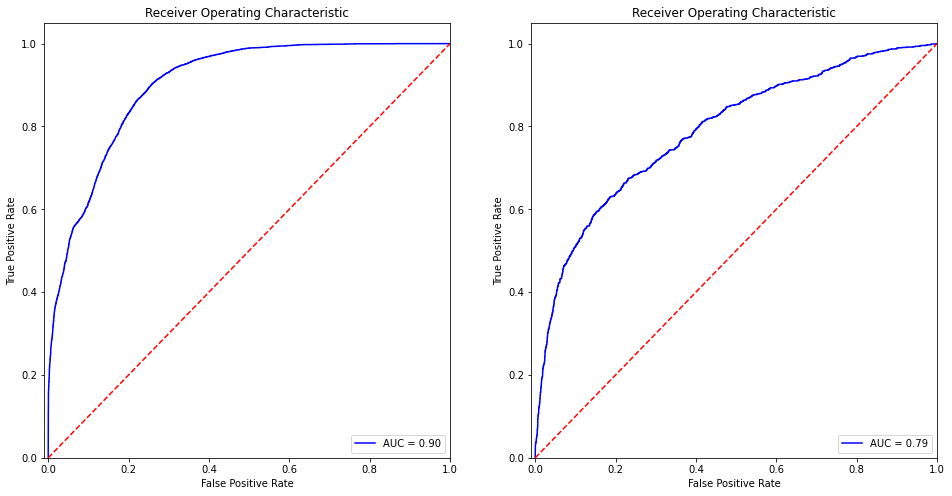

In [103]:
AUC_train_stack, AUC_test_stack = graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clf)
accuracy_stack, precision_stack, error_stack = metricas_modelo(XTest_transform, yTest, clf)


AUC_train_dict["stackingClassifier"] = AUC_train_stack
AUC_test_dict["stackingClassifier"] = AUC_test_stack
accuracy_dict["stackingClassifier"] = accuracy_stack
precision_dict["stackingClassifier"] = precision_stack
error_dict["stackingClassifier"] = error_stack

# Seleccion de Modelo

In [106]:
AUC_train_dict.keys()

dict_keys(['RandomForest', 'GradientBoosting', 'VotingClassifier', 'stackingClassifier'])

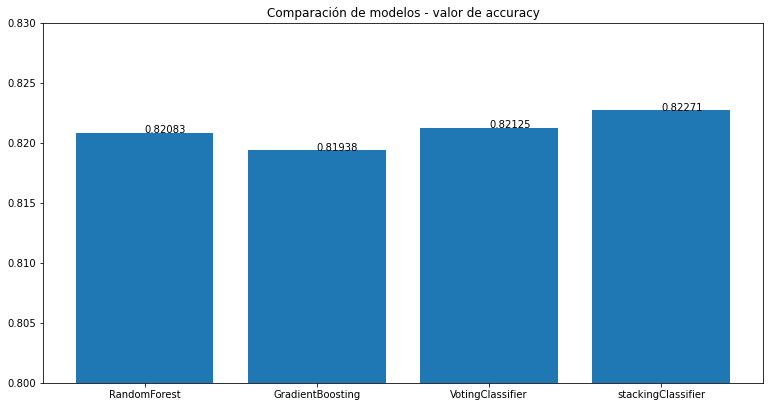

In [121]:

MSE_models = []
ejeX = []

for k,v in accuracy_dict.items():
    MSE_models.append(round(v,5))
    ejeX.append(k)

ejeY = MSE_models

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos - valor de accuracy")
ax.set_ylim([0.8,0.83])

ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

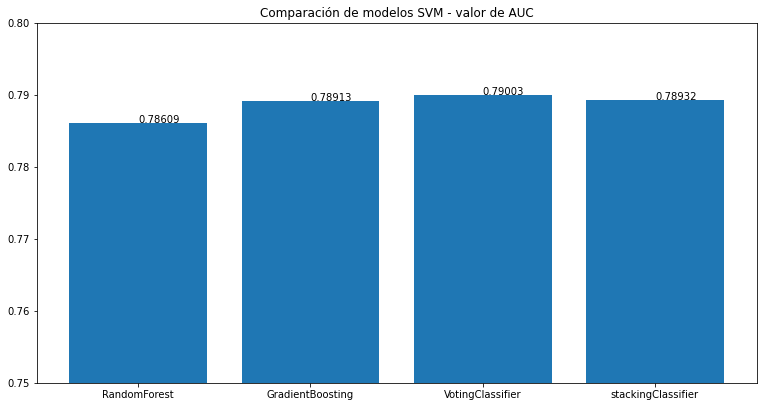

In [122]:
MSE_models = []
ejeX = []

for k,v in AUC_test_dict.items():
    MSE_models.append(round(v,5))
    ejeX.append(k)

ejeY = MSE_models

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos SVM - valor de AUC")
ax.set_ylim([0.75,0.8])

ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

en las graficas anteriores se ve el valor de **AUC** para el set de datos de train dondese ve que el mejor modelo es el **VotingCalssifier** sin embargo al ver las metricas de **accuracy** el mejor desempeño esta en el modelo de **stackingClassifier**.

Al interior del grupo se decidio dar prioridad a la metrica de **accuracy** sobre la metrica de **AUC**, porque al realizar envios tempranos en la competencia se veia un mejor comportamiento en el puntaje cuando se prioirizaba el accuracy sobre el AUC|

# Conclusiones

Con todas las iteraciones utilizadas concluimos que:

- la transformacion de variables es importante para mejorar el desempeño de los modelos, no solo la estandarizacion y codificacion(OneHotEncoding) si no tambien la creacion de nuevas variables a parti de las originales, al hacer esto nuestros modelos tuvieron un incremento en su desempeño

- La teoria nos indica que al codificar variables categoricas se deberia elminar las variables originales, sin embargo gracias a un accidente evidenciamos que el modelo tenia mejor desempeño al incluir las variables originales y la scodificadas 

- GradientBoosting siempre tuvo un mejor desempeño que los otros modelos individuales, esto debido a que es un modelo de apredinzaje lento que hace mas flexible el modelo. Obteniendo mejores predicciones

- La trayectoria de la exploración de los modelos que usamos siguió de manera general el dragrama de flujo de SKLearn, culminando en que los mejores clasificadores eran SVM lineal y los que usan K-Vecinos. Los métodos de ensamblaje de modelos se aplicaron para potenciar los beneficios de estos clasificadores.

- Las mejores soluciones fueron aqellas que utilizaron varios modelos e integraban sus salidas ya sea por medio del VotingClassifier o StackingClassifier

- No existe una única metrica para medir el desempeño de un modelo, ya que como vimos en la seleccion del mejor modelo, al escoger como metrica de decision el **accuracy** se obtuvo un modelo que era mas robusto frente a los imputs de nuevos datos, como se evidencia en los resultados de la competencia    

- la calibracion de hiperparametros es importante para la mejora de distintos modelos, y asi mismo para mantener la integridad de resultados es necesario fijar un valor de random_state en cada uno de los modelos y pasos que lo incluyan

# Submission

Logica empleada para aplicar el modelo a los datos de Test y colocar el formato necesario para la entrega

In [123]:
submission_df = pd.read_excel("data/Test.xlsx")
submission_df = submission_df.rename(columns={"default.payment.next.month":"default", "PAY_0":"PAY_1"})

Xsubmission = transform_x(submission_df)
col_dummies = ['MARRIAGE','EDUCATION','SEX'] + ["PAY_{i}".format(i=x) for x in np.arange(1,7)]
Xsubmission = pd.concat([Xsubmission,pd.DataFrame(encoder.transform(Xsubmission[col_dummies]).toarray(), columns = encoder.get_feature_names_out(), index = Xsubmission.index)], axis = 1)
#Xsubmission = Xsubmission.drop(columns=col_dummies)

var_cont = ['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                'REFUND_AMT1','POS_BILL_AMT1','REFUND_AMT2', 'POS_BILL_AMT2',
                'REFUND_AMT3', 'POS_BILL_AMT3', 'REFUND_AMT4', 'POS_BILL_AMT4',
                'REFUND_AMT5', 'POS_BILL_AMT5', 'REFUND_AMT6', 'POS_BILL_AMT6', 'TREND_BILL_AMT', 'TREND_PAY_AMT',
                'PROPORTION_BILL_LIMIT','DIFF_BILL_PAY_1', 'DIFF_BILL_PAY_2',
                'DIFF_BILL_PAY_3',
                'DIFF_BILL_PAY_4', 'DIFF_BILL_PAY_5',
                'PROPORTION_BILL_PAYED']


c_val = (mu_inf <= np.sort(mu_inf)[seleccion_variables_arg_max])


# Xsubmission_PCA = pca.transform(Xsubmission[var_cont])
# cols_categ = [x for x in Xsubmission.columns.values if x not in var_cont]
# Xsubmission_PCA = pd.concat([pd.DataFrame(Xsubmission_PCA, index=Xsubmission.index),Xsubmission[cols_categ]], axis=1)
# Xsubmission_PCA.columns = Xsubmission_PCA.columns.astype(str)

# col_dummies = ['MARRIAGE','EDUCATION','SEX'] + ["PAY_{i}".format(i=x) for x in np.arange(1,7)]
# Xsubmission = pd.concat([Xsubmission,pd.DataFrame(encoder.transform(Xsubmission[col_dummies]).toarray(), columns = encoder.get_feature_names_out(), index = Xsubmission.index)], axis = 1)




# prediccion_submission = clfGB.predict_proba(Xsubmission_PCA)[:,1]
prediccion_submission = clf.predict_proba(Xsubmission)[:,1]

In [124]:
pd.DataFrame()
export_df = Xsubmission
export_df["Probability"] = prediccion_submission

export_df = export_df["Probability"].reset_index()
export_df.columns = ["Id","Probability"]
export_df["Id"] = export_df["Id"]+1

export_df.to_csv("data/submission.csv",index=False)